In [25]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import glob
import re

# import sys
# sys.path.insert(0,'../CPM_code')
# from MSD1cell import *
# from OrderNpersist import * 

In [49]:
# Import processed csv
df = pd.read_csv('../CPMjs/scripts/results_dens.csv',index_col = 0)
    

In [50]:
df

,Model,Density,speed,peristance,order
0,ACT,0.008,3.157143,0.453160,NaN
1,ACT,0.296,4.277380,0.480285,0.000268
2,ACT,0.200,5.442677,0.479700,0.005301
3,ACT,0.496,3.401545,0.488026,0.000332
4,ACT,0.400,3.643778,0.484492,0.000574
5,ACT,0.696,2.851108,0.487011,0.000238
6,ACT,0.600,3.280245,0.485585,-0.000638
7,ACT,0.896,2.758160,0.483830,0.000237
8,ACT,0.800,2.825595,0.487993,0.001233
9,ACT,1.000,2.413254,0.484205,0.000167


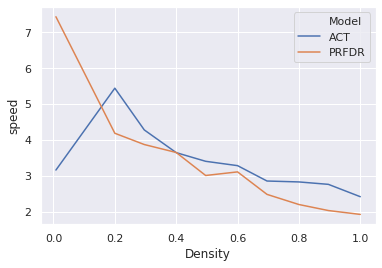

In [28]:
# plot Dens vs Speed :
sns.lineplot(x = 'Density',y = 'speed',data = df, hue = 'Model')
plt.show()

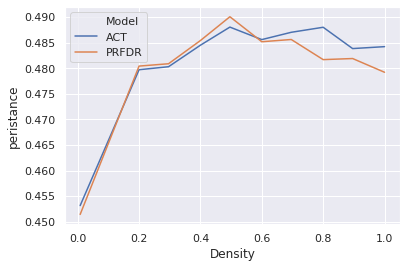

In [30]:
# plot Dens vs Persistance : 
sns.lineplot(x = 'Density',y = 'peristance',data = df, hue = 'Model')
plt.show()

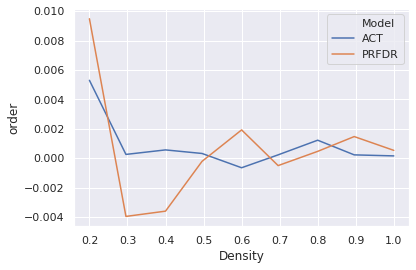

In [31]:
# plot Dens vs Order : 
sns.lineplot(x = 'Density',y = 'order',data = df, hue = 'Model')
plt.show()

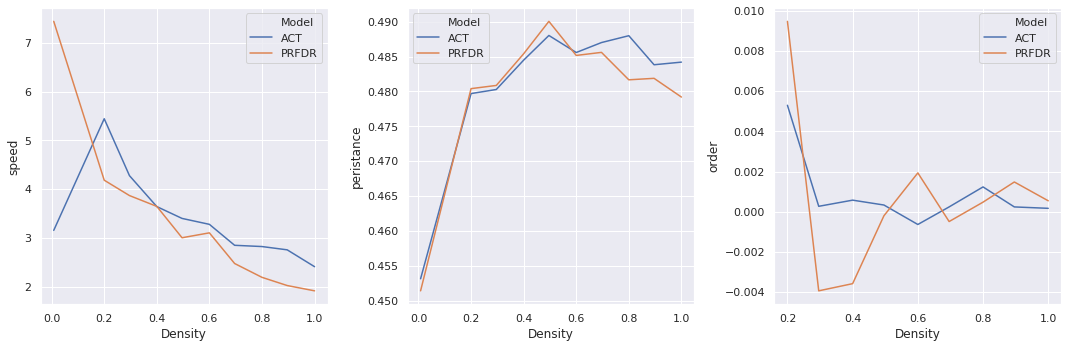

In [53]:
figure,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
sns.lineplot(x = 'Density',y = 'speed',data = df, hue = 'Model',ax = ax1)
sns.lineplot(x = 'Density',y = 'peristance',data = df, hue = 'Model',ax = ax2)
sns.lineplot(x = 'Density',y = 'order',data = df, hue = 'Model',ax = ax3)
plt.tight_layout()

In [54]:
# ACT and LAMBDA from c++ version : 
df = pd.read_csv('../CPM_code/result_per_param_fullLN3.csv',index_col = 0)
df.head()

,index,Lambda,Max_act,speed,persistance,order
0,0,500,875,0.035408,0.362418,-0.014677
1,1,1000,1000,0.113417,0.463459,0.001214
2,2,750,1000,0.087469,0.373405,0.000613
3,3,2000,500,0.388660,12.225078,0.003414
4,4,5000,1000,0.460051,8.754391,-0.000798


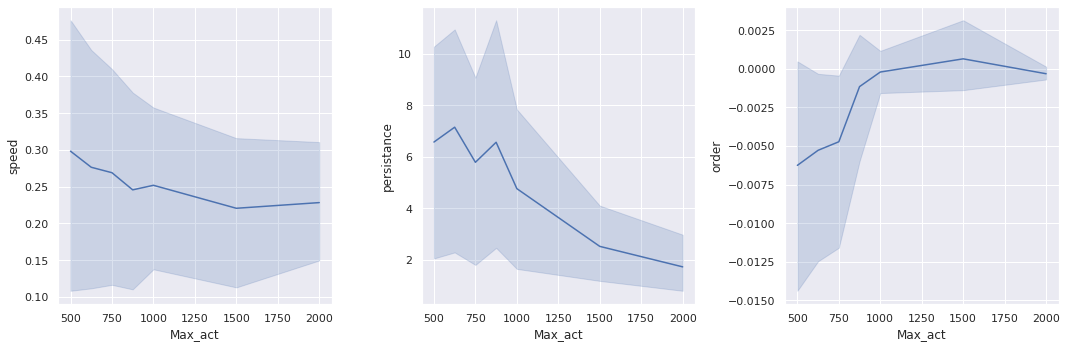

In [55]:
# plot ACT - speed | persist | order
# g = sns.FacetGrid(df, col="")
# g.map(plt.hist, "tip");
figure,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
sns.lineplot(x = 'Max_act',y = 'speed',data = df, ax = ax1)
sns.lineplot(x = 'Max_act',y = 'persistance',data = df, ax = ax2)
sns.lineplot(x = 'Max_act',y = 'order',data = df, ax = ax3)
plt.tight_layout()
plt.show()

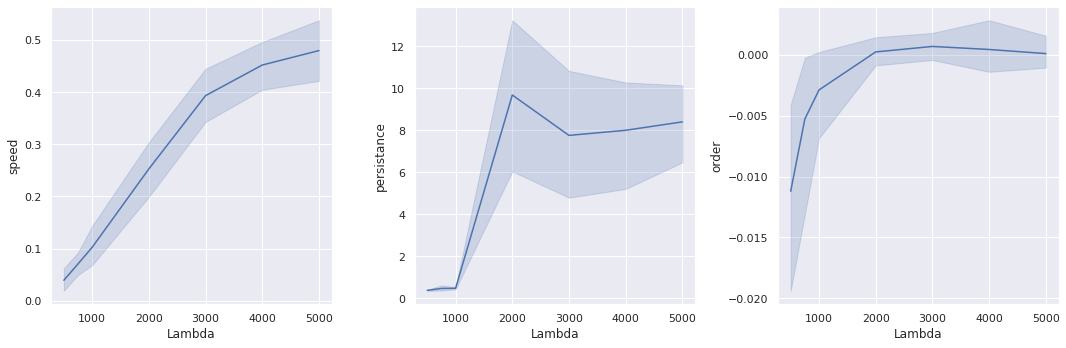

In [56]:
figure,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
sns.lineplot(x = 'Lambda',y = 'speed',data = df, ax = ax1)
sns.lineplot(x = 'Lambda',y = 'persistance',data = df, ax = ax2)
sns.lineplot(x = 'Lambda',y = 'order',data = df, ax = ax3)
plt.tight_layout()
plt.show()

In [23]:
# create data frame with fields : 
#|| act/prfdir | density | speed | perisitance | order ||
# data :
files = glob.glob('/home/lau/Desktop/Thesis Stuff/cpmjsDensity/*')
num_ptrn = '[-+]?\d*\.\d+|\d+'
#files.sort()
# loop over files and compute average speed | peristance | order
rows = []
for f in files:
    print(f)
    data = pd.read_csv(f, sep="\t", names=['time','id','ctype', 'x', 'y', 'z'])   
    # create list of arrays of cell tracks 
    ids = data.id.unique()
    tracks = [data[data.id == ID].to_numpy()[:,-3:] for ID in ids]
    print(len(ids),len(tracks))
    print(tracks[0].shape)
    
    # speed and order: 
    vec_tracks = np.array([to_vecs(t) for t in tracks])
    speed = np.mean([norm(v) for v in vec_tracks])
    order = Order_tracks(vec_tracks)
    # persistance : 
    autocors = [new_auto(t) for t in tracks]
    persist = Persist_tracks(autocors)
    print(speed,persist,order)
    # params : 
    sim_type = f.split('_')[0].split('/')[-1]
    density = density = float(re.findall(num_ptrn,f.split('_')[1])[0])
    rows.append([sim_type,density,speed,persist,order])
    
df = pd.DataFrame(data= rows, columns = ['Model','Density','speed','peristance','order'])

/home/lau/Desktop/Thesis Stuff/cpmjsDensity/ACT_0.8log.txt
100 100
(500, 3)


KeyboardInterrupt: 